<a href="https://colab.research.google.com/github/tontoin20/ImersaoDado/blob/main/Imers%C3%A3oDados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Aula 01 - Sua primeira análise em dados da Educação**



In [ ]:
import pandas as pd

fonte = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"

dados = pd.read_csv(fonte)
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ACAEAAACABEBABAADCEEEDE*CBDCCCADADCCCBEBBBBDB,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ABBCEADCEBAAACACEDCDCDACCCACDCBCABCAACBDBDEDE,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CDCAACCAAADEACBBEBAAEECDABDEBAEAABEDCABABAABC,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EECCCEDBADBEAAAAEBAECEAAAAEEEBACCAC*CEAEDAECE,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CCBCBEACABACABBBBACCBCEBDCBABCADADCBCADBAADEA,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B


In [ ]:
#Proporção de inscritos por idade
dados['NU_IDADE'].value_counts()/len(dados['NU_IDADE'])*100


18    16.840948
17    16.687078
19    11.318888
20     8.174753
16     6.146962
        ...    
75     0.001570
73     0.001570
82     0.000785
77     0.000785
76     0.000785
Name: NU_IDADE, Length: 65, dtype: float64

In [ ]:
# Estados que contém inscritos com 13 anos de idade: 
dados.query("NU_IDADE == 13")[['NU_IDADE',"SG_UF_RESIDENCIA"]]


,NU_IDADE,SG_UF_RESIDENCIA
57359,13,SP
95630,13,MT
98197,13,AP
116501,13,BA


Text(0.5, 1.0, 'Tabela Idade - Enem')

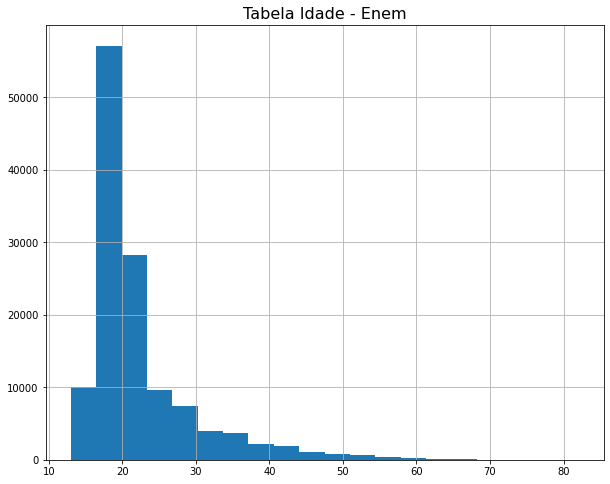

In [ ]:
### Desafio03: Adicionar título no gráfico
dados["NU_IDADE"].hist(bins = 20, figsize = (10,8)).set_title("Tabela Idade - Enem", size=16)

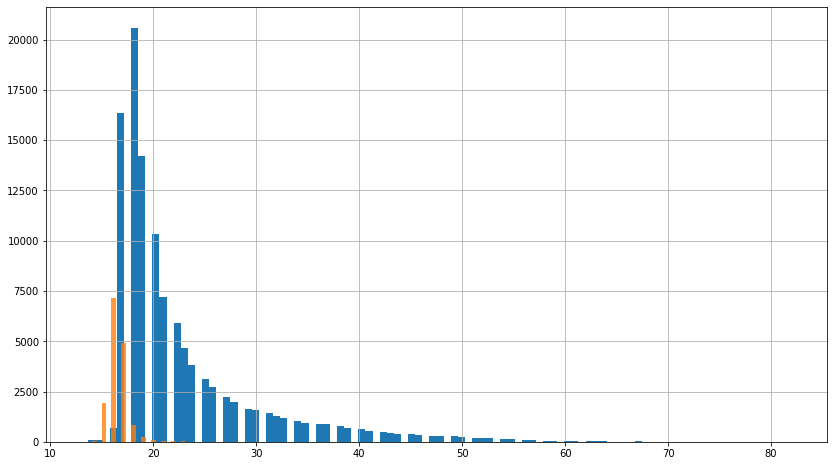

In [ ]:
### Desafio04: Plotar os Histogramas das idades dos do treineiro e não treineiros.

dados.query("IN_TREINEIRO==0")["NU_IDADE"].hist(bins = 100, figsize=(14,8))
dados.query("IN_TREINEIRO==1")["NU_IDADE"].hist(bins = 100, figsize=(14,8), alpha=0.8)

In [ ]:
provas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]
dados[provas].describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO
count,92758.000000,98043.000000,92758.000000,98043.000000,98043.000000
mean,477.964015,507.365912,523.555206,520.463928,571.570025
std,76.296099,82.972839,109.416939,64.556578,188.076455
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,418.000000,447.900000,435.300000,483.700000,480.000000
50%,470.200000,510.900000,501.600000,526.100000,580.000000
75%,533.300000,567.100000,598.200000,565.100000,680.000000
max,797.300000,809.400000,985.000000,801.700000,1000.000000


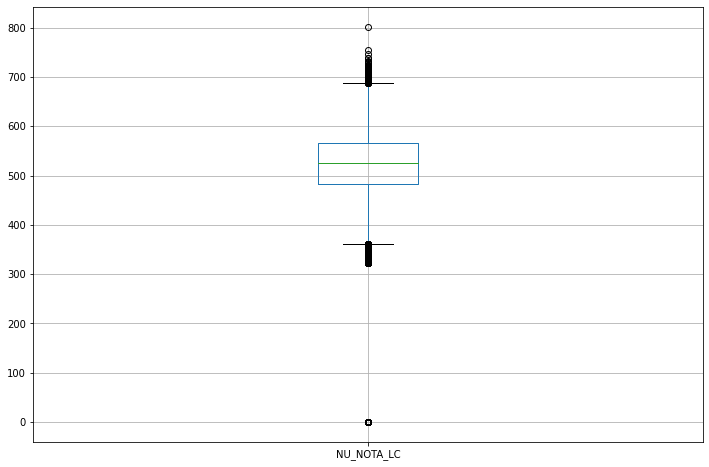

In [ ]:

dados["NU_NOTA_LC"].plot.box(grid = True, figsize=(12,8))

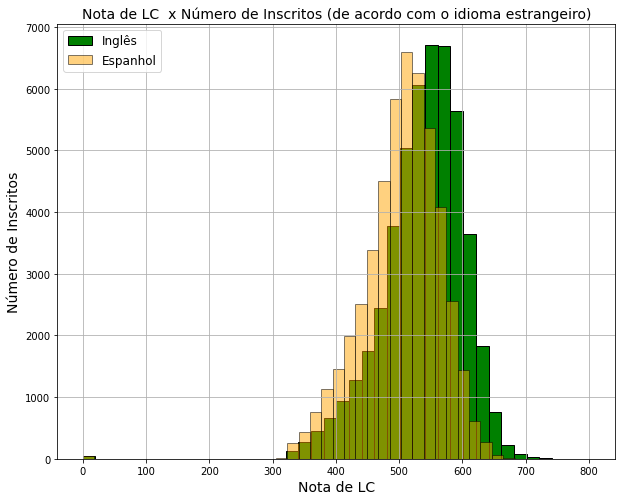

In [ ]:
### Desafio05: Comparar as distribuições das provas em inglês espanhol

import matplotlib.pyplot as plt

ingles = dados.query('TP_LINGUA==0')["NU_NOTA_LC"]
espanhol = dados.query('TP_LINGUA==1') ['NU_NOTA_LC']
ingles.plot.hist(bins=40, grid=True, ec='k', figsize=(10,8), color='green', label='Inglês')
espanhol.plot.hist(bins=40, grid=True, ec='k', figsize=(10,8), color='orange', label='Espanhol',alpha=0.5)
plt.title('Nota de LC  x Número de Inscritos (de acordo com o idioma estrangeiro)',fontsize=14)
plt.xlabel('Nota de LC', fontsize=14)
plt.ylabel('Número de Inscritos', fontsize=14)
plt.legend(loc=2, fontsize=12)

Desafio01: Proporção dos inscritos por idade.

Desafio02: Descobrir de quais estados são os inscritos com 13 anos.

Desafio03: Adicionar título no gráfico

Desafio04: Plotar os Histogramas das idades dos do treineiro e não treineiros.

Desafio05: Comparar as distribuições das provas em inglês espanhol

Desafio06: Explorar a documentações e visualizações com matplotlib ou pandas e gerar novas visualizações.

## **Aula 2 - Análise exploratória de dados**




In [ ]:
dados.query('NU_IDADE==13')['SG_UF_RESIDENCIA']

57359     SP
95630     MT
98197     AP
116501    BA
Name: SG_UF_RESIDENCIA, dtype: object

In [ ]:
# Normalização (Proporção) por estado, de inscritos com idade menor ou igual 14 anos
dados.query('NU_IDADE<=14')['SG_UF_RESIDENCIA'].value_counts(normalize=True)

PE    0.124138
CE    0.103448
BA    0.096552
PA    0.082759
SP    0.075862
MG    0.075862
MA    0.062069
PI    0.048276
GO    0.048276
PB    0.048276
AM    0.027586
MT    0.027586
DF    0.027586
SE    0.020690
PR    0.020690
TO    0.020690
RO    0.013793
AL    0.013793
SC    0.013793
RN    0.006897
RS    0.006897
RJ    0.006897
AP    0.006897
MS    0.006897
ES    0.006897
AC    0.006897
Name: SG_UF_RESIDENCIA, dtype: float64

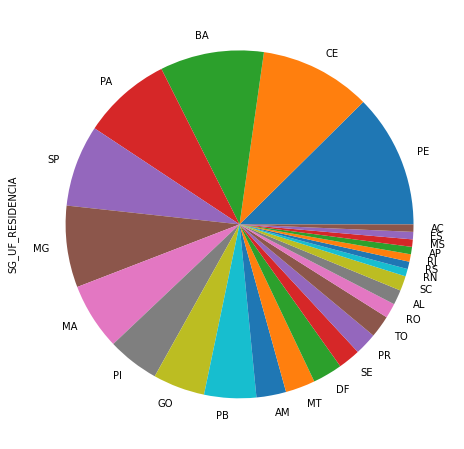

In [ ]:
#graficos 

alunos_menor_quartoze = dados.query('NU_IDADE <= 14')
alunos_menor_quartoze["SG_UF_RESIDENCIA"].value_counts().plot.pie(figsize=(10,8))




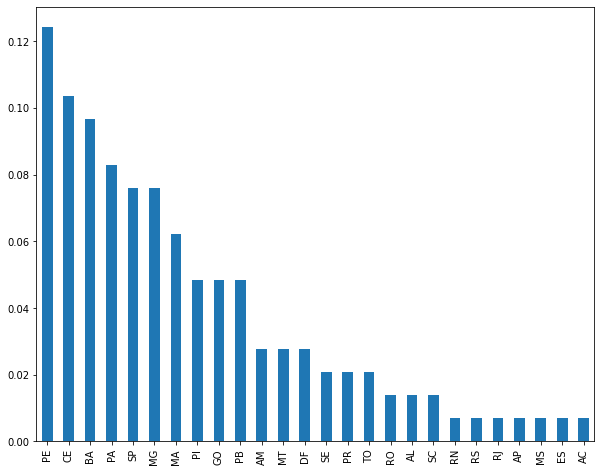

In [ ]:
alunos_menor_quartoze["SG_UF_RESIDENCIA"].value_counts(normalize = True).plot.bar(figsize=(10,8))

Text(0.5, 0, 'Estados')

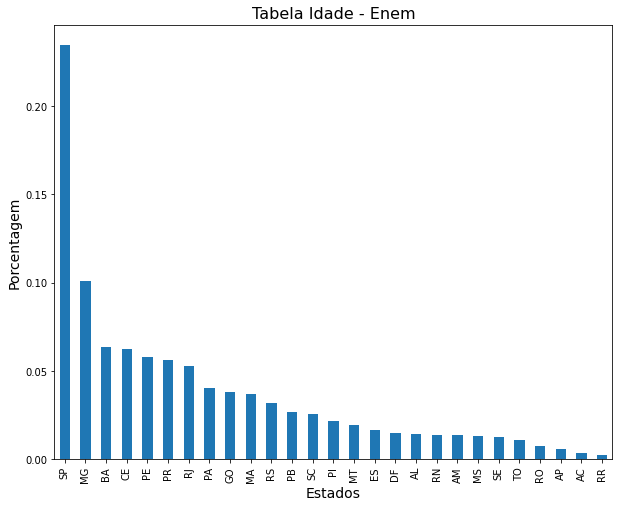

In [ ]:
#Desafio do Gui bonzinho: aumentar a amostra para alunos menor de idade e compara a proporção por estado.
import matplotlib.pyplot as plt
alunos_menor_quartoze = dados.query('NU_IDADE <= 17')
alunos_menor_quartoze["SG_UF_RESIDENCIA"].value_counts(normalize=True).plot.bar(figsize=(10,8), label = 'porcentagem').set_title("Tabela Idade - Enem", size=16)
plt.ylabel('Porcentagem', fontsize=14)
plt.xlabel('Estados', fontsize=14)

Text(0.5, 1.0, 'Boxplot das notas de Matematica pela renda')

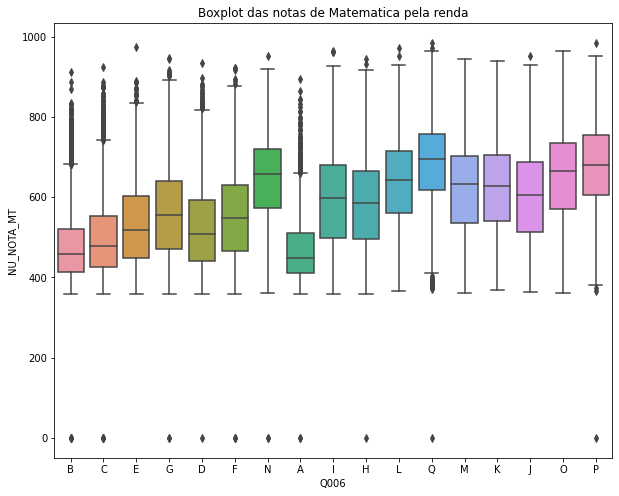

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.boxplot(x="Q006", y = "NU_NOTA_MT", data = dados)
plt.title("Boxplot das notas de Matematica pela renda")

In [ ]:
renda_ordenada = dados['Q006'].unique()
renda_ordenada.sort()
renda_ordenada

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q'], dtype=object)

Text(0.5, 1.0, 'Boxplot das notas de Matematica pela renda')

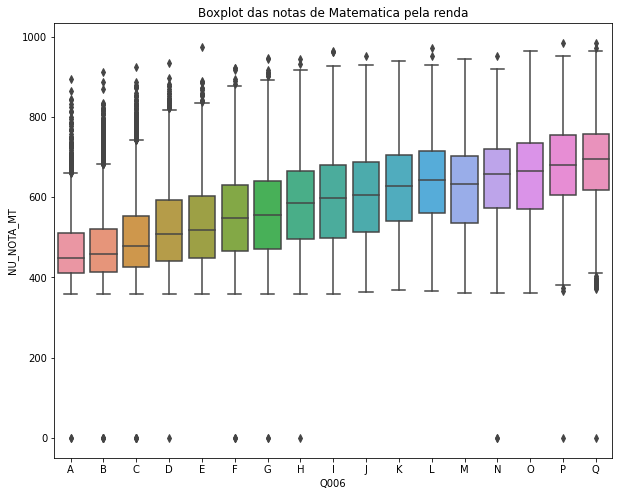

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.boxplot(x="Q006", y = "NU_NOTA_MT", data = dados, order = renda_ordenada)
plt.title("Boxplot das notas de Matematica pela renda")

In [ ]:
#calcular nota total

dados[provas].sum()

NU_NOTA_CN         44334986.1
NU_NOTA_CH         49743676.1
NU_NOTA_MT         48563933.8
NU_NOTA_LC         51027844.9
NU_NOTA_REDACAO    56038440.0
dtype: float64

In [ ]:

dados["NU_NOTA_TOTAL"] = dados[provas].sum(axis=1)
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B,2288.9
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B,1184.6
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B,2350.5
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B,2555.7
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B,2803.5


Text(0.5, 1.0, 'Boxplot das notas de total pela renda')

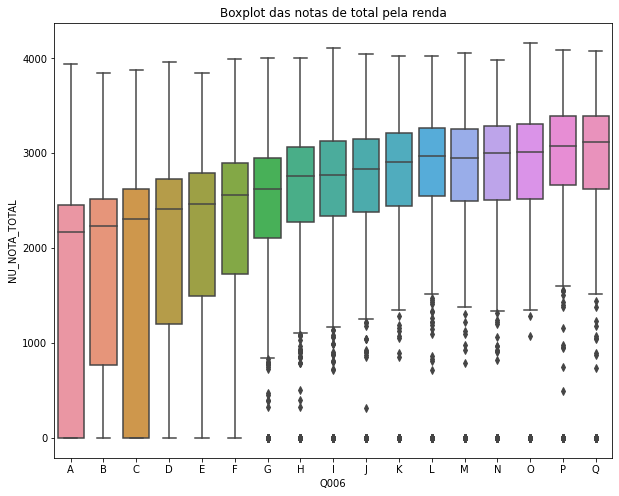

In [ ]:
#Boxplot das notas total pela renda

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.boxplot(x="Q006", y = "NU_NOTA_TOTAL", data = dados, order = renda_ordenada)
plt.title("Boxplot das notas de total pela renda")

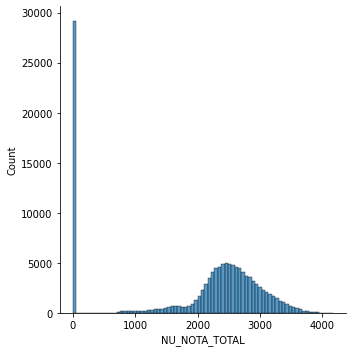

In [ ]:
sns.displot(dados, x="NU_NOTA_TOTAL")

In [ ]:
dados.query("NU_NOTA_TOTAL== 0")

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
10,190001005028,2019,1506807,Santarém,15,PA,28,F,2,3,1,1506807.0,Santarém,15.0,PA,1,9,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,B,A,B,2,B,A,B,C,A,A,B,A,A,A,A,A,A,B,B,A,B,A,A,A,0.0
11,190001005057,2019,1501709,Bragança,15,PA,36,F,1,3,1,1501709.0,Bragança,15.0,PA,1,13,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,C,A,A,4,B,A,B,D,A,A,B,A,A,A,A,A,A,B,B,A,B,A,A,B,0.0
26,190001005484,2019,1504208,Marabá,15,PA,26,M,2,3,1,1721208.0,Tocantinópolis,17.0,TO,1,8,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,B,C,C,2,C,A,B,B,A,A,B,A,A,A,B,A,A,B,A,A,C,A,B,B,0.0
38,190001006086,2019,1508126,Ulianópolis,15,PA,29,F,1,3,1,2108108.0,Paulo Ramos,21.0,MA,1,11,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,C,A,A,5,C,A,B,C,A,B,B,A,A,A,A,A,A,B,B,A,C,A,A,B,0.0
40,190001006292,2019,1504422,Marituba,15,PA,24,M,1,1,1,1504422.0,Marituba,15.0,PA,1,5,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,B,F,B,6,G,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,D,A,A,B,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127351,190006118552,2019,2604106,Caruaru,26,PE,20,F,1,1,1,2604106.0,Caruaru,26.0,PE,1,3,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,E,D,B,5,H,A,C,D,B,A,B,B,B,A,B,A,A,D,A,A,E,A,B,B,0.0
127365,190006119756,2019,2302503,Brejo Santo,23,CE,22,F,1,3,1,2308104.0,Mauriti,23.0,CE,2,0,2,1.0,0,23169249.0,2302503.0,Brejo Santo,23.0,CE,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,B,A,A,5,C,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A,0.0
127366,190006119783,2019,2304400,Fortaleza,23,CE,27,F,1,3,1,2304400.0,Fortaleza,23.0,CE,2,0,2,NaN,0,23071460.0,2304400.0,Fortaleza,23.0,CE,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,B,B,B,4,B,A,B,B,A,B,B,A,A,A,B,A,A,A,A,A,A,B,B,A,0.0
127368,190006119802,2019,2507507,João Pessoa,25,PB,18,M,1,2,1,2507507.0,João Pessoa,25.0,PB,1,1,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,F,A,A,5,C,A,C,E,B,A,B,A,A,A,A,A,B,B,A,A,C,A,A,B,0.0


In [ ]:
dados_sem_nota_zero = dados.query("NU_NOTA_TOTAL != 0")
dados_sem_nota_zero.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B,2288.9
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B,1184.6
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B,2350.5
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B,2555.7
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B,2803.5


Text(0.5, 1.0, 'Boxplot das notas de total pela renda')

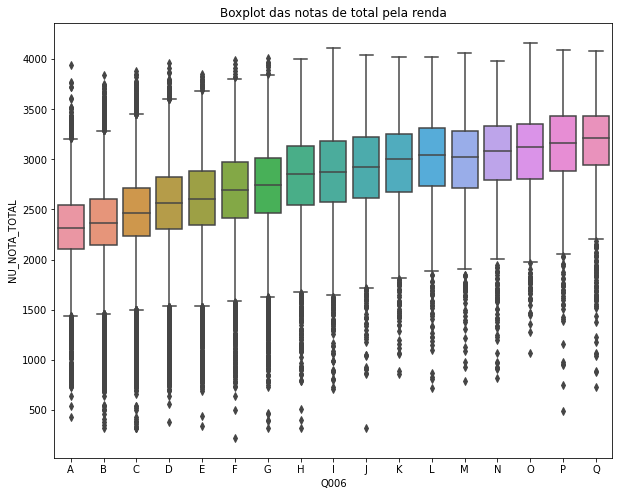

In [ ]:
#Boxplot das notas total pela renda

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.boxplot(x="Q006", y = "NU_NOTA_TOTAL", data = dados_sem_nota_zero, order = renda_ordenada)
plt.title("Boxplot das notas de total pela renda")

Text(0.5, 1.0, 'Boxplot das notas de total pela renda')

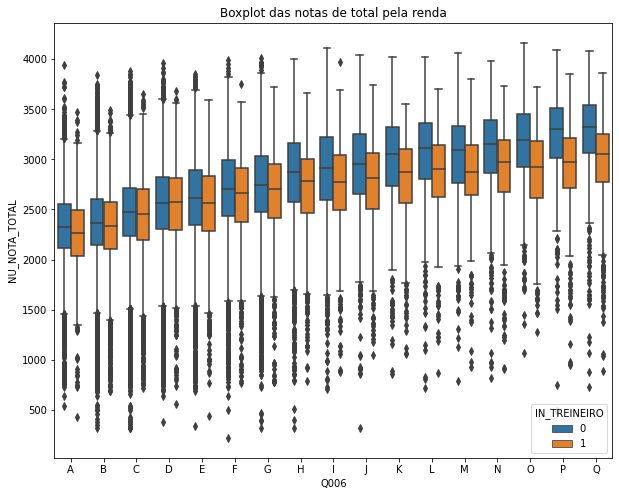

In [ ]:
#Boxplot das notas total pela renda

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.boxplot(x="Q006", y = "NU_NOTA_TOTAL", data = dados_sem_nota_zero, order = renda_ordenada, 
            hue = "IN_TREINEIRO" )
plt.title("Boxplot das notas de total pela renda")

In [ ]:
#### Desafio 3: Criar uma função para plotar o boxplot do seaborn




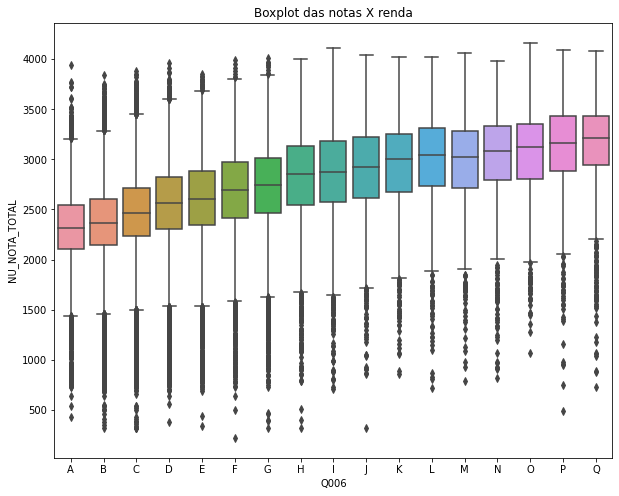

In [ ]:
#Boxplot das notas total pela renda

def plotBox(dado, sumtot, ordem=renda_ordenada, renda=None, xz=10, yz = 8, titulo = "Boxplot das notas X renda"):
  plt.figure(figsize=(xz,yz))
  plt.title(titulo)
  return sns.boxplot(x="Q006", y = sumtot, data = dado,hue=renda, order = ordem)

plotBox(dados_sem_nota_zero, "NU_NOTA_TOTAL")
  ##sns.boxplot(x="Q006", y = "NU_NOTA_TOTAL", data = dados, order = renda_ordenada)


In [ ]:
#### Desafio 4: Verificar se quem zerou a prova foi eliminado ou não estava presente
#
## 0 - Faltou, 1 - Presente, 2 - Eliminado
presenca = ["TP_PRESENCA_LC","TP_PRESENCA_CH","TP_PRESENCA_MT","TP_PRESENCA_CN"]
dados.query("NU_NOTA_TOTAL ==0")[presenca].value_counts()


TP_PRESENCA_LC  TP_PRESENCA_CH  TP_PRESENCA_MT  TP_PRESENCA_CN
0               0               0               0                 28998
2               2               0               0                   120
1               1               0               0                    39
0               0               1               1                     3
1               1               1               1                     2
dtype: int64

In [ ]:
#### Desafio 5: Quem é eliminado tira zero ou será NaN (não teve registro de notas)
import matplotlib.pyplot as plt

dados2 = dados.query("TP_PRESENCA_LC == 2")["NU_NOTA_LC"].unique()

dados2

array([nan])

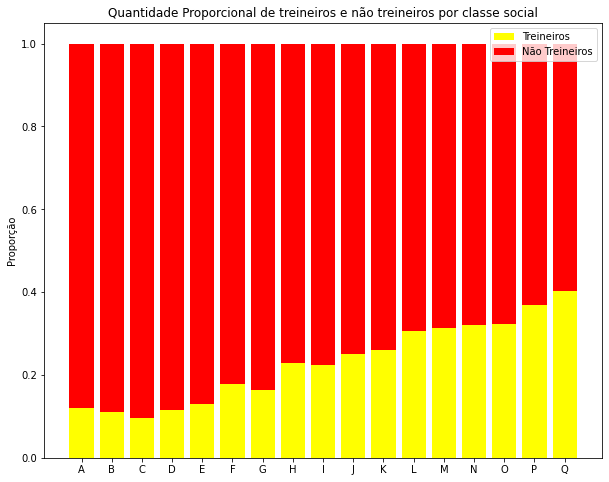

In [ ]:
#### Desafio 6: Verificar a proporção dos participantes de rendas mais altas e mais baixas como treineiro e não treineiro.
treineiros = dados_sem_nota_zero.query("IN_TREINEIRO == 1")["Q006"].value_counts()
naotreineiros = dados_sem_nota_zero.query("IN_TREINEIRO == 0")["Q006"].value_counts()

treinprop=treineiros/(treineiros+naotreineiros)
naotreinprop=naotreineiros/(treineiros+naotreineiros)
fig, ax = plt.subplots(figsize=(10,8))

ax.bar(renda_ordenada, treinprop, label='Treineiros',color='yellow')
ax.bar(renda_ordenada, naotreinprop, bottom=treinprop, label='Não Treineiros',color='red')

ax.set_ylabel('Proporção')
ax.set_title('Quantidade Proporcional de treineiros e não treineiros por classe social')
ax.legend()

plt.show()

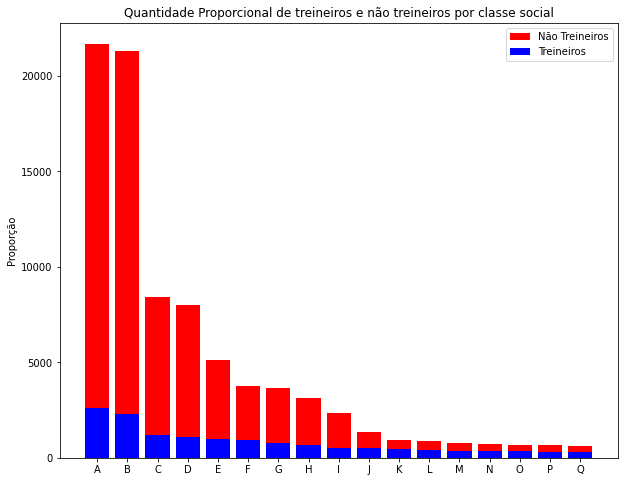

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))

ax.bar(renda_ordenada, naotreineiros, bottom=treinprop, label='Não Treineiros',color='red')
ax.bar(renda_ordenada, treineiros, label='Treineiros',color='blue')

ax.set_ylabel('Proporção')
ax.set_title('Quantidade Proporcional de treineiros e não treineiros por classe social')
ax.legend()

plt.show()

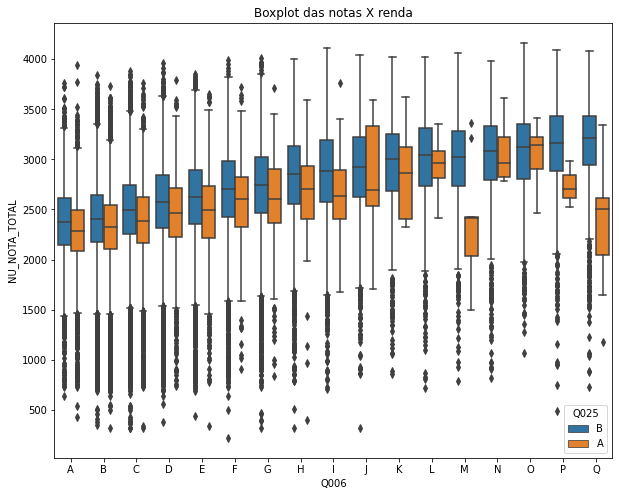

In [ ]:
#### Desafio 7: Fazer o mesmo boxplot olhando para a questão 25 (tem internet ou não) e fazer uma reflexão sobre o assunto e o contexto de pandemia.

plotBox(dados_sem_nota_zero,"NU_NOTA_TOTAL",renda="Q025")


B- Tem internet

A - Não tem internet

MEGA DESAFIO DA THAINÁ: Pegar a amostra completa dos alunos de 13 e 14 anos

Desafio do Gui bonzinho: aumentar a amostra para alunos menor de idade e compara a proporção por estado.

Desafio 3: Criar uma função para plotar o boxplot do seaborn

Desafio 4: Verificar se quem zerou a prova foi eliminado ou não estava presente

Desafio 5: Quem é eliminado tira zero ou será NaN (não teve registro de notas)

DEsafio 6: Verificar a proporção dos participantes de rendas mais altas e mais baixas como treineiro e não treineiro.

Desafio 7: Fazer o mesmo boxplot olhando para a questão 25 (tem internet ou não) e fazer uma reflexão sobre o assunto e o contexto de pandemia.

# **Aula 3: Distribuições e correlações entre notas**

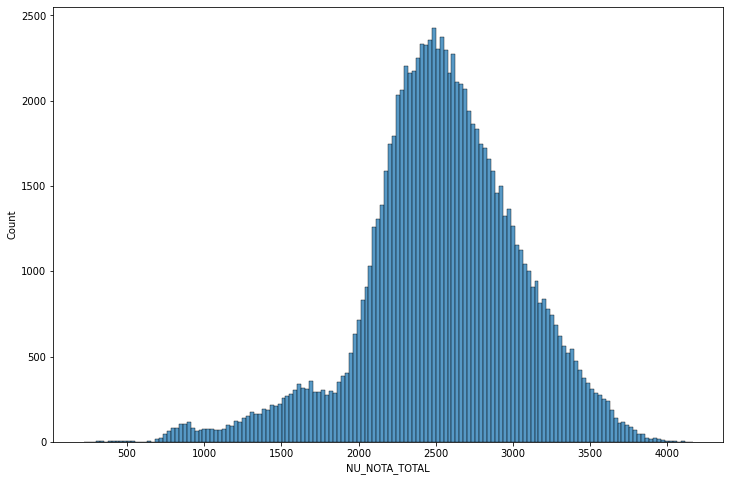

In [ ]:
#Histograma do total das notas

plt.figure(figsize=(12,8))
sns.histplot(dados_sem_nota_zero, x = "NU_NOTA_TOTAL")

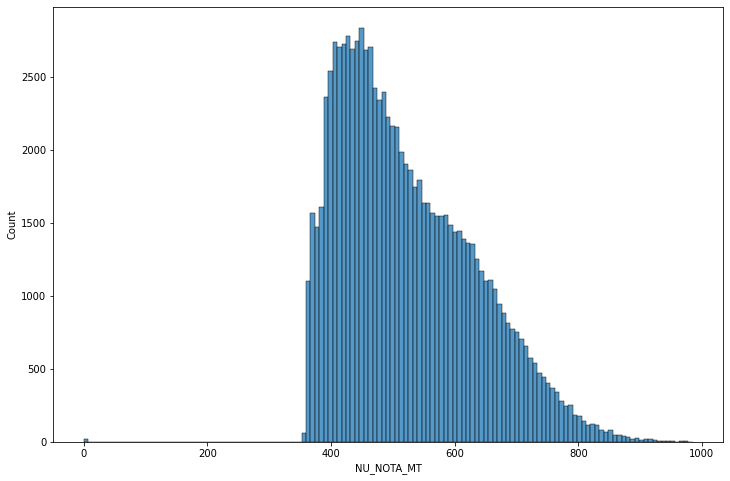

In [ ]:
#Histograma das notas Matematica

plt.figure(figsize=(12,8))
sns.histplot(dados_sem_nota_zero, x = "NU_NOTA_MT")

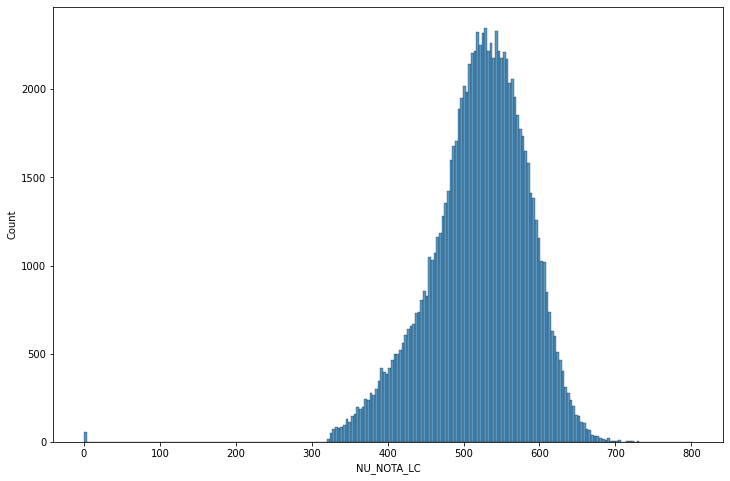

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(dados_sem_nota_zero, x = "NU_NOTA_LC")

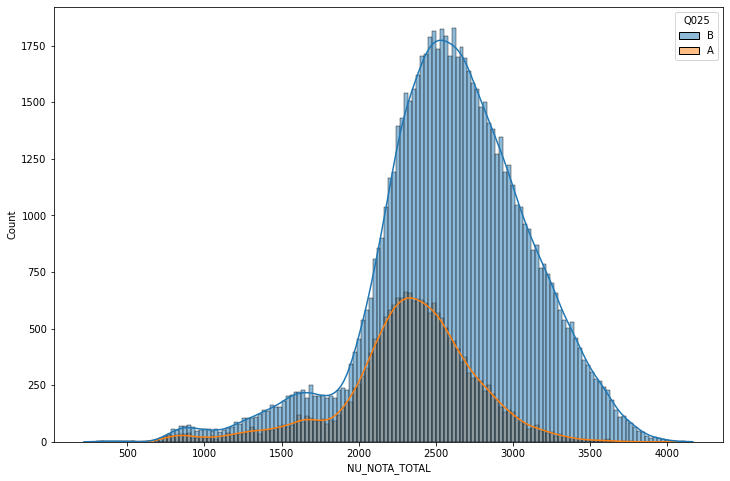

In [ ]:
# B - Tem Internet
# A - Não tem internet

plt.figure(figsize=(12,8))
sns.histplot(dados_sem_nota_zero, x = "NU_NOTA_TOTAL", hue="Q025", kde=True)

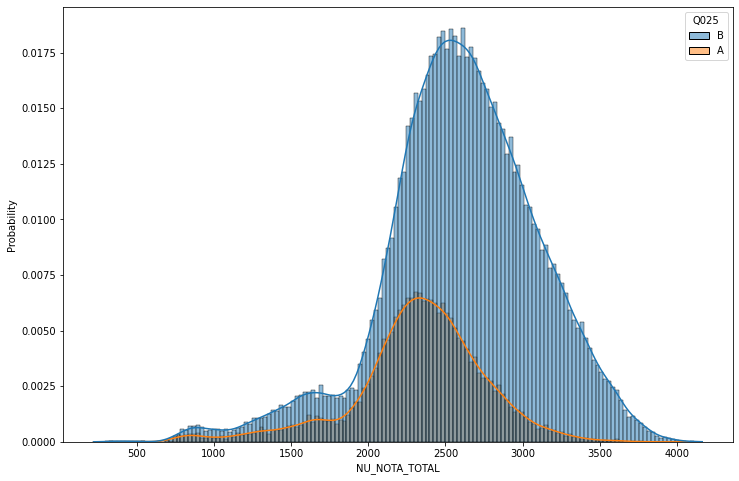

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(dados_sem_nota_zero, x = "NU_NOTA_TOTAL", hue="Q025", kde=True, stat="probability")

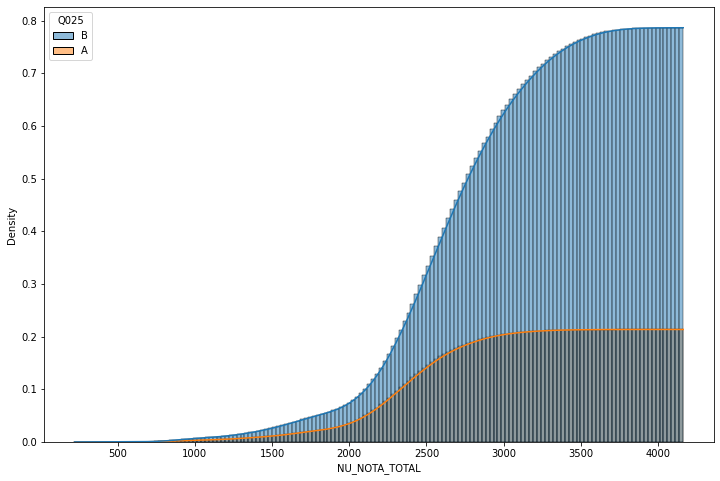

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(dados_sem_nota_zero, x = "NU_NOTA_TOTAL", hue="Q025", kde=True, stat="density", cumulative=True)

(-50.0, 1050.0)

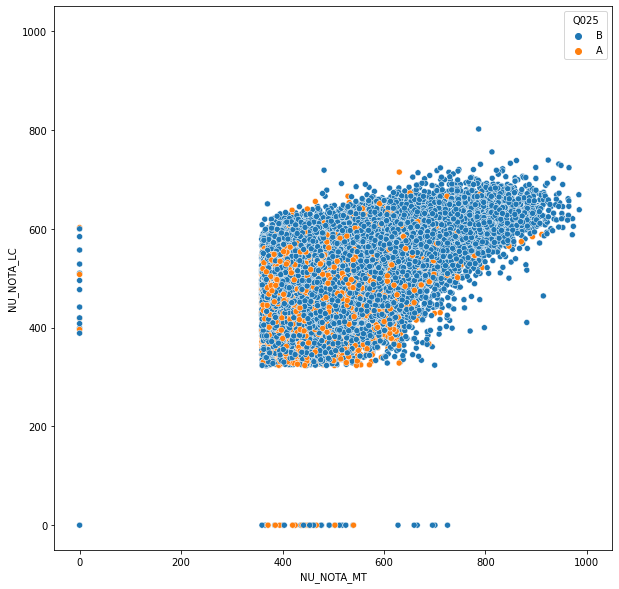

In [ ]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data = dados_sem_nota_zero, x="NU_NOTA_MT", y="NU_NOTA_LC", hue="Q025")
plt.xlim((-50, 1050))
plt.ylim((-50, 1050))

In [ ]:
provas

['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']

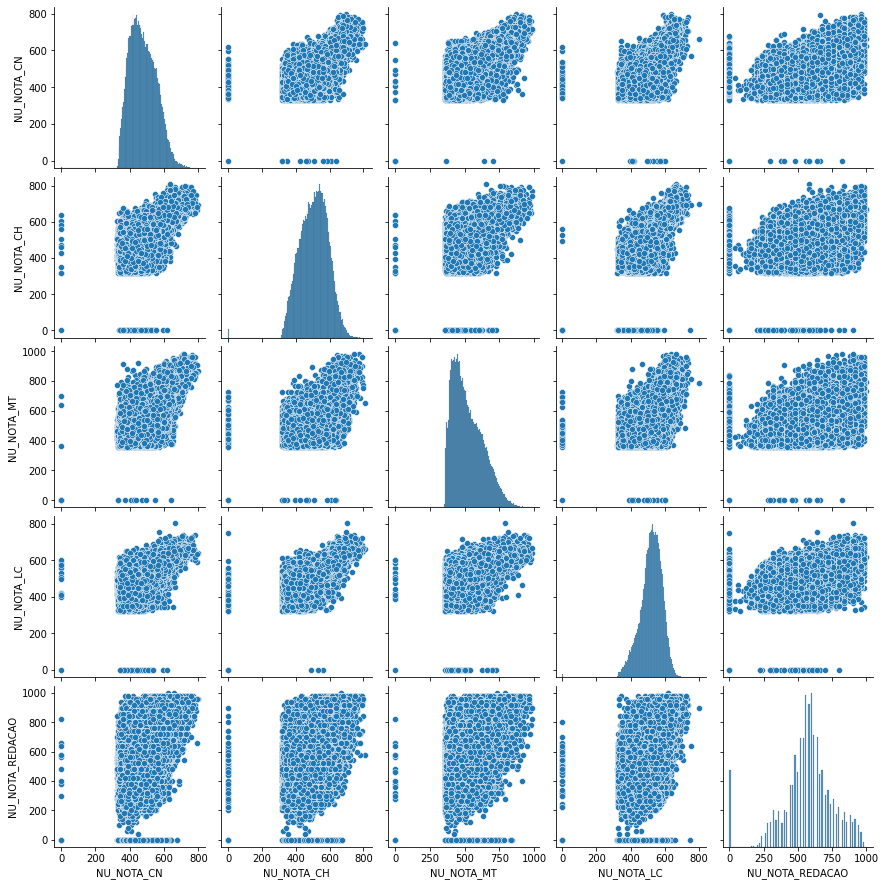

In [ ]:
sns.pairplot(dados_sem_nota_zero[provas])

In [ ]:
correlacao = dados_sem_nota_zero[provas].corr()
correlacao

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO
NU_NOTA_CN,1.000000,0.668979,0.649527,0.641624,0.504740
NU_NOTA_CH,0.668979,1.000000,0.610332,0.744170,0.528338
NU_NOTA_MT,0.649527,0.610332,1.000000,0.587710,0.493046
NU_NOTA_LC,0.641624,0.744170,0.587710,1.000000,0.535797
NU_NOTA_REDACAO,0.504740,0.528338,0.493046,0.535797,1.000000


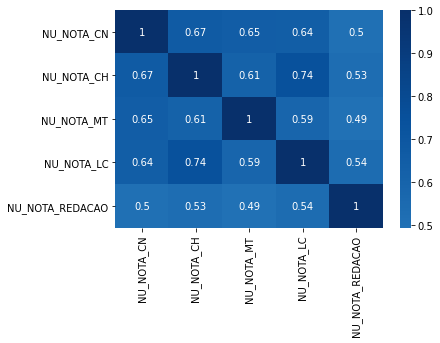

In [ ]:
sns.heatmap(correlacao, cmap="Blues", center=0, annot=True)

Desafio: Plotar as médias, medianas e moda nas notas de LC e MT (matiplotlib linha vertical)

Desafio2: Melhorar a visualização da matriz de correlação e analisar mais detalhadamente.

Desafio3: Filtrar as notas por seu estado ou sua cidade e refazer as análises, verificando se são semelhantes ao geral.

Desafio4: Pensar sobre a correlação entre matemática e Linguagens.

desafio 01: Plotar as médias, medianas e moda nas notas de LC e MT (matiplotlib linha vertical)

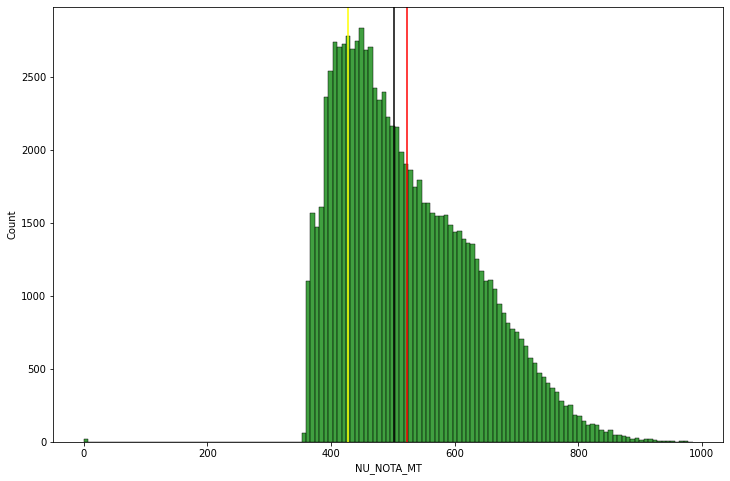

In [ ]:
### Desafio: Plotar as médias, medianas e moda nas notas de LC e MT (matiplotlib linha vertical)

media_MT = dados_sem_nota_zero["NU_NOTA_MT"].mean()
moda_MT = float(dados_sem_nota_zero["NU_NOTA_MT"].mode())
Mediana_MT = dados_sem_nota_zero["NU_NOTA_MT"].median()

plt.figure(figsize=(12,8))
sns.histplot(dados_sem_nota_zero, x = "NU_NOTA_MT", color = "green")

plt.axvline(x=media_MT,ymin=0,ymax=1, color = 'red')
plt.axvline(x=moda_MT,ymin=0,ymax=1, color = 'yellow')
plt.axvline(x=Mediana_MT,ymin=0,ymax=1, color = 'black')
#plt.grid()
plt.show()

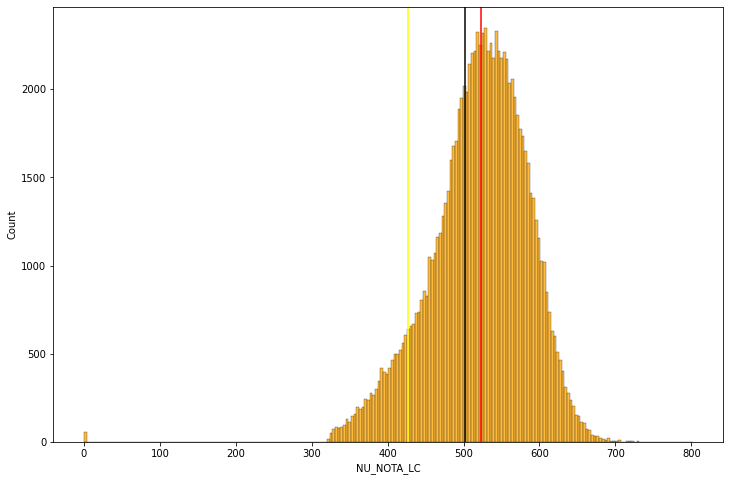

In [ ]:
media_LC = dados_sem_nota_zero["NU_NOTA_LC"].mean()
moda_LC = float(dados_sem_nota_zero["NU_NOTA_LC"].mode())
Mediana_LC = dados_sem_nota_zero["NU_NOTA_LC"].median()

plt.figure(figsize=(12,8))
sns.histplot(dados_sem_nota_zero, x = "NU_NOTA_LC", color = "orange")

plt.axvline(x=media_MT,ymin=0,ymax=1, color = 'red')
plt.axvline(x=moda_MT,ymin=0,ymax=1, color = 'yellow')
plt.axvline(x=Mediana_MT,ymin=0,ymax=1, color = 'black')
#plt.grid()
plt.show()

**Desafio2: Melhorar a visualização da matriz de correlação e analisar mais detalhadamente.**

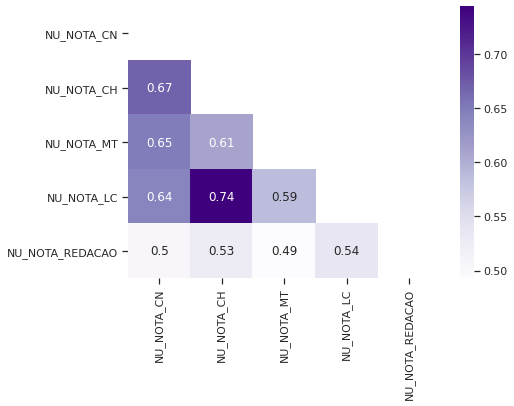

In [ ]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()

correlacao02 = dados_sem_nota_zero[provas].corr()
mask = np.zeros_like(correlacao02)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("ticks"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(correlacao02, mask=mask, annot=True, cmap = "Purples")


##sns.heatmap(correlacao, cmap="Blues", center=0, annot=True)


**Desafio3: Filtrar as notas por seu estado ou sua cidade e refazer as análises, verificando se são semelhantes ao geral.**

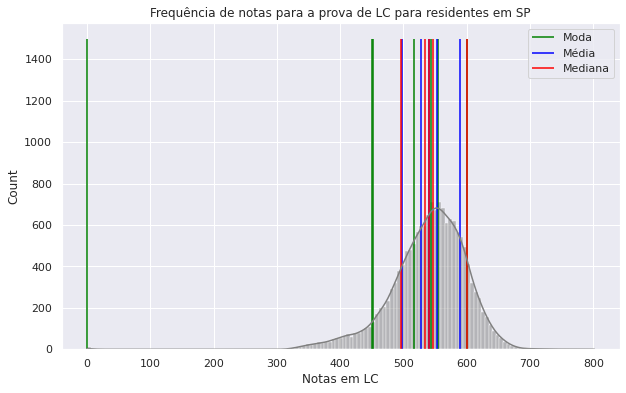

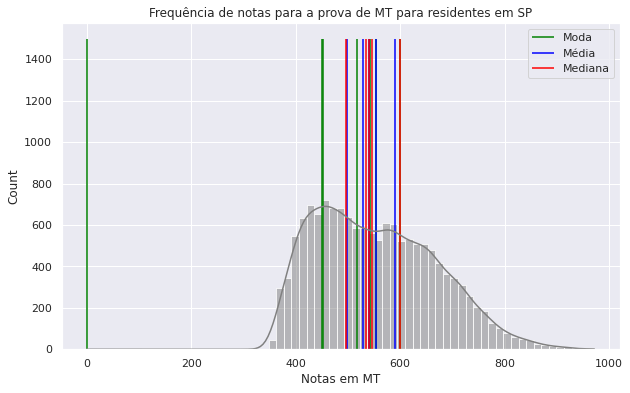

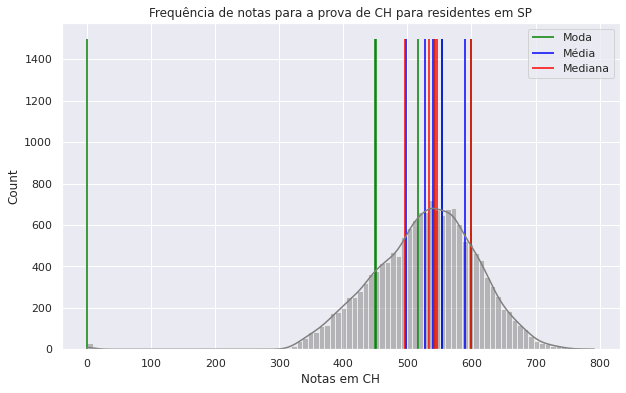

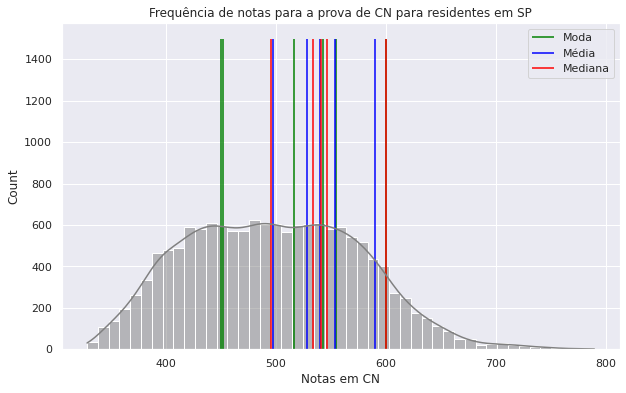

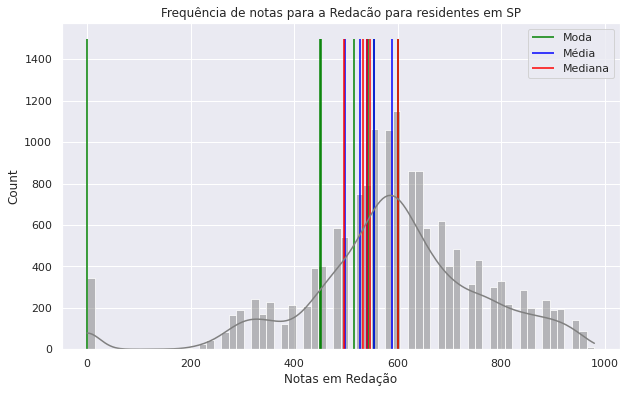

In [ ]:
#Desafio 3


#Criando uma função para plotar as provas por Residência
def hist_prova (res_dados, prova, titulo_res, label_res):
  modares = res_dados[provas].mode()
  mediares= res_dados[provas].mean()
  medianares = res_dados[provas].median()
  plt.figure(figsize=(10,6))
  l_modares = plt.vlines(x=modares, ymin=0, ymax= 1500, colors="green")
  l_mediares = plt.vlines(x=mediares, ymin=0, ymax= 1500, colors="blue")
  l_medianares = plt.vlines(x=medianares, ymin=0, ymax= 1500, colors="red")
  sns.histplot(res_dados, x = prova, kde=True, color="gray")
  plt.legend((l_modares, l_mediares, l_medianares), ("Moda", "Média", "Mediana"))
  plt.title(titulo_res)
  plt.xlabel(label_res)
  plt.show()


  #Dados para SP
provas_res_sp= dados_sem_nota_zero.query("SG_UF_RESIDENCIA == 'SP'")[provas]
dados["NU_NOTA_TOTAL"] = dados[provas].sum(axis=1)
#LC
hist_prova(provas_res_sp, "NU_NOTA_LC","Frequência de notas para a prova de LC para residentes em SP","Notas em LC")
#Demais provas
hist_prova(provas_res_sp, "NU_NOTA_MT","Frequência de notas para a prova de MT para residentes em SP","Notas em MT")
hist_prova(provas_res_sp, "NU_NOTA_CH","Frequência de notas para a prova de CH para residentes em SP","Notas em CH")
hist_prova(provas_res_sp, "NU_NOTA_CN","Frequência de notas para a prova de CN para residentes em SP","Notas em CN")
hist_prova(provas_res_sp, "NU_NOTA_REDACAO","Frequência de notas para a Redacão para residentes em SP","Notas em Redação")
#hist_prova(provas_res_sp, "NU_NOTA_TOTAL","Frequência de notas para a nota Total para residentes em SP","Notas Totais ")

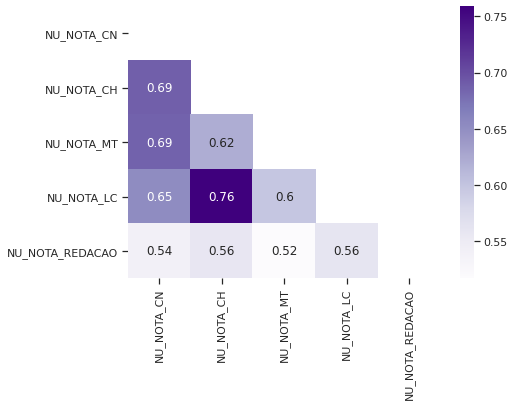

In [ ]:
#Correlação SP

import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()

correlacao_sp = provas_res_sp.corr()

mask = np.zeros_like(correlacao_sp)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("ticks"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(correlacao_sp, mask=mask, annot=True, cmap = "Purples")

**Desafio4: Pensar sobre a correlação entre matemática e Linguagens.**

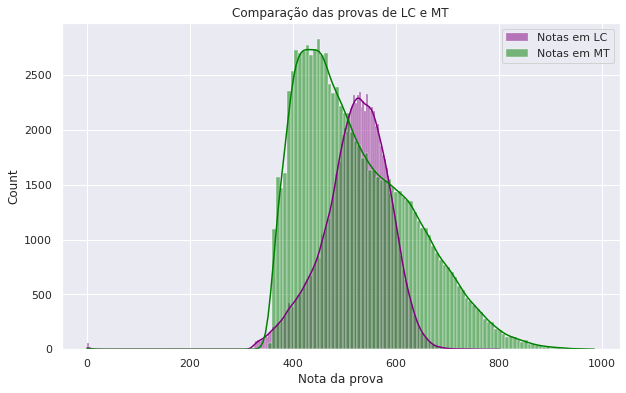

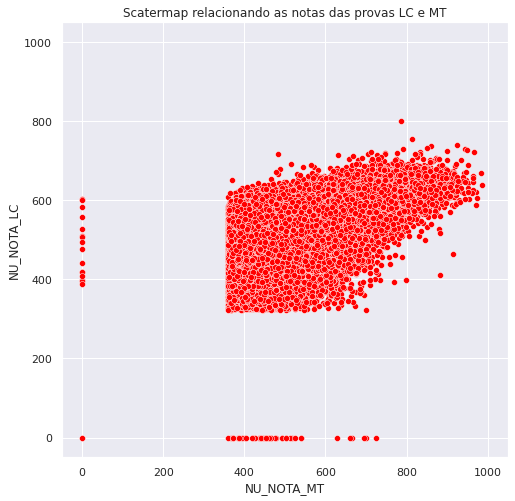

In [ ]:
#Desafio 4
plt.figure(figsize=(10,6))
sns.histplot(dados_sem_nota_zero, x = "NU_NOTA_LC", kde=True, label="Notas em LC", alpha=0.5 , color="purple")
sns.histplot(dados_sem_nota_zero, x = "NU_NOTA_MT", kde=True, label="Notas em MT",alpha=0.5 , color="green")
plt.xlabel("Nota da prova")
plt.legend()
plt.title("Comparação das provas de LC e MT")
plt.show()

plt.figure(figsize=(8, 8))
sns.scatterplot(data = dados_sem_nota_zero, x="NU_NOTA_MT", y="NU_NOTA_LC",color="red")
plt.xlim((-50, 1050))
plt.ylim((-50, 1050))
plt.title("Scatermap relacionando as notas das provas LC e MT")
plt.show()

# **AULA 4: PREVENDO NOTAS COM MACHINE LEARNING**

In [ ]:
['NU_NOTA_CN',
 'NU_NOTA_CH',
 'NU_NOTA_MT',
 'NU_NOTA_LC',
 'NU_NOTA_REDACAO',
 'NU_NOTA_TOTAL']

In [ ]:
provas_entrada = ["NU_NOTA_CH","NU_NOTA_LC", "NU_NOTA_CN","NU_NOTA_REDACAO"]
prova_saida = "NU_NOTA_MT"
dados_sem_nota_zero = dados_sem_nota_zero[provas].dropna()
notas_entrada = dados_sem_nota_zero[provas_entrada]
notas_saida = dados_sem_nota_zero[prova_saida]



In [ ]:
notas_entrada

,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_CN,NU_NOTA_REDACAO
0,512.3,488.6,435.6,420.0
2,499.1,441.0,423.2,560.0
3,578.1,551.5,426.2,500.0
4,571.3,511.2,516.5,780.0
5,618.7,607.5,559.6,900.0
...,...,...,...,...
127373,501.5,485.3,480.4,520.0
127375,559.6,525.7,502.4,740.0
127376,380.9,450.3,449.1,520.0
127378,416.2,517.3,564.7,620.0


In [ ]:
x = notas_entrada
y = notas_saida 

In [ ]:
# sklearn biblioteca

from sklearn.model_selection import train_test_split

SEED = 4321

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.25,
                                                        random_state=SEED)

In [ ]:
x_treino.head()

,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_CN,NU_NOTA_REDACAO
90200,567.7,523.2,542.7,660.0
12375,497.1,423.0,445.2,580.0
46320,494.0,528.5,454.0,520.0
111208,561.9,572.7,385.8,640.0
75943,686.5,646.5,625.7,900.0


In [ ]:
from sklearn.svm import LinearSVR

modelo = LinearSVR(random_state = SEED)
modelo.fit(x_treino, y_treino)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=4321, tol=0.0001, verbose=0)

In [ ]:
predicoes_matematica = modelo.predict(x_teste)

In [ ]:
y_teste[:5]

114991    459.7
104685    617.2
91028     520.0
115802    703.8
93303     627.1
Name: NU_NOTA_MT, dtype: float64

(-50.0, 1050.0)

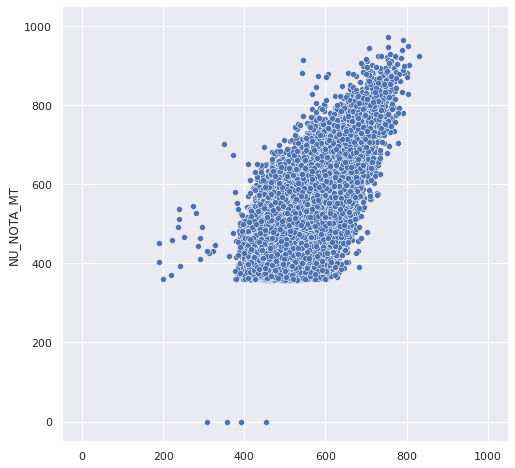

In [ ]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x=predicoes_matematica, y=y_teste)
plt.xlim((-50, 1050))
plt.ylim((-50, 1050))

(-450.0, 650.0)

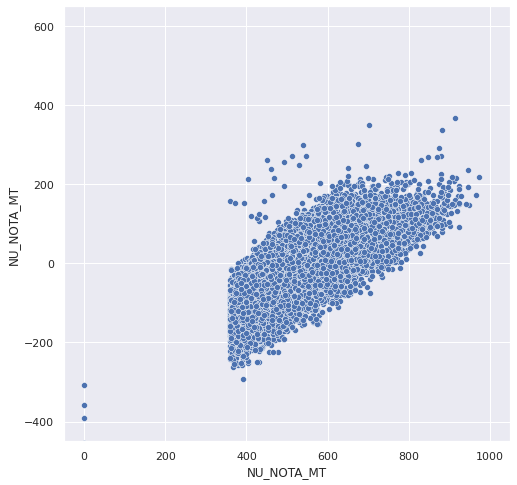

In [ ]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_teste, y=y_teste- predicoes_matematica)
plt.xlim((-50, 1050))
plt.ylim((-450, 650))

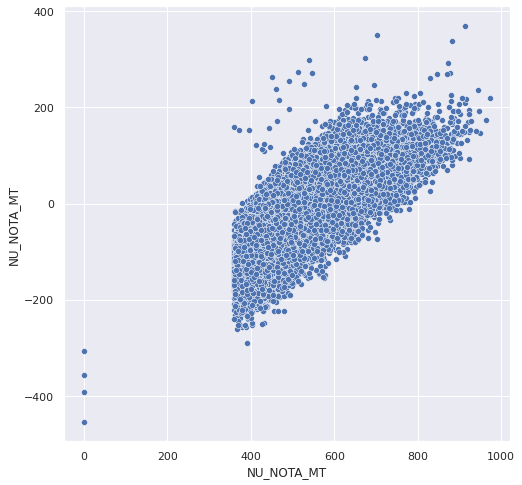

In [ ]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_teste, y=y_teste - predicoes_matematica)


(-50.0, 1050.0)

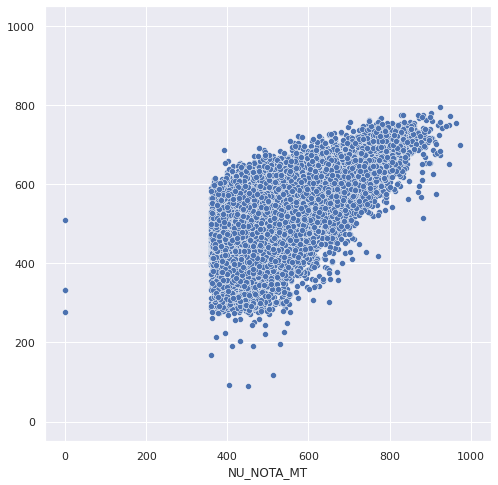

In [ ]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_teste, y=x_teste.mean(axis=1))
plt.xlim((-50, 1050))
plt.ylim((-50, 1050))

In [ ]:
resultados = pd.DataFrame()
resultados["Real"] = y_teste
resultados["Previsao"] = predicoes_matematica
resultados["diferenca"] = resultados["Real"] - resultados["Previsao"]
resultados["quadrado_diferenca"] = (resultados["Real"] - resultados["Previsao"])**2

In [ ]:
resultados

,Real,Previsao,diferenca,quadrado_diferenca
114991,459.7,564.486105,-104.786105,10980.127878
104685,617.2,628.305027,-11.105027,123.321625
91028,520.0,509.980986,10.019014,100.380650
115802,703.8,593.681144,110.118856,12126.162420
93303,627.1,579.784588,47.315412,2238.748252
...,...,...,...,...
81393,688.6,626.291851,62.308149,3882.305380
40159,479.1,652.313922,-173.213922,30003.062777
64083,501.4,607.787172,-106.387172,11318.230438
84661,772.5,734.227663,38.272337,1464.771772


In [ ]:
resultados["quadrado_diferenca"].mean()

6604.415306219529

In [ ]:
resultados["quadrado_diferenca"].mean()**(1/2)

81.26755383435341

In [ ]:
from sklearn.dummy import DummyRegressor

modelo_dummy = DummyRegressor()
modelo_dummy.fit(x_treino, y_treino)
dummy_predicoes = modelo_dummy.predict(x_teste)

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_teste, dummy_predicoes)


12063.645588509502

In [ ]:
mean_squared_error(y_teste, predicoes_matematica)

6604.41530621957

Desafio01: Procurar outro modelo de ML para treinar e comparar com os modelos criados em aula

Desafio02: Ler a documentação do Dummy e alterar o método de regressão

Desafio03: Buscar outra métrica para avaliar modelos de regressão

In [ ]:
# Desafio01: Procurar outro modelo de ML para treinar e comparar com os modelos criados em aula



In [ ]:
#Desafio02: Ler a documentação do Dummy e alterar o método de regressão

modelo_dummy_median = DummyRegressor(strategy='median')
modelo_dummy_median.fit(x_treino, y_treino)
modelo_dummy_median_pred = modelo_dummy_median.predict(x_teste)


In [ ]:

mean_squared_error(y_teste, modelo_dummy_median_pred)**(1/2)

112.24958784688691

6299.984985897991